In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
adelaide_df = pd.read_csv('Adelaide_Data.csv', header=None)
perth_df = pd.read_csv('Perth_Data.csv', header=None)
sydney_df = pd.read_csv('Sydney_Data.csv', header=None)
tasmania_df = pd.read_csv('Tasmania_Data.csv', header=None)

def column_names(df):
  df.columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
              'Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y6', 'Y7', 'Y8', 'Y9', 'Y10', 'Y11', 'Y12', 'Y13', 'Y14', 'Y15', 'Y16',
              'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16',
              'Powerall']

column_names(adelaide_df)
column_names(perth_df)
column_names(sydney_df)
column_names(tasmania_df)

tasmania_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
0,546.1931,194.5337,160.0840,435.5412,220.8238,449.5166,396.1027,231.7794,69.3599,474.1572,...,216324.3888,242794.9467,234589.0464,241446.2196,266320.5629,188114.6855,170653.5874,195915.6535,180922.3979,3648666.894
1,281.0669,390.3761,561.0742,295.9217,565.5344,236.3035,393.0648,340.0667,213.7463,457.8913,...,228315.9892,196579.4315,265924.2946,236228.4838,229197.3604,212649.9615,253153.4761,265363.3600,251322.8751,3810742.386
2,566.0000,566.0000,346.5334,202.2120,389.6777,277.7876,421.9610,260.3339,464.1620,566.0000,...,216919.6851,210539.3646,234470.2783,245953.6945,200980.6210,203164.4624,262784.1109,269371.6293,265446.7199,3745925.666
3,2.1045,352.3969,285.2965,566.0000,532.4306,176.8103,566.0000,0.0000,234.7225,485.8672,...,231355.4783,267915.4110,239599.8014,239349.6550,239027.6745,194421.2484,200775.3338,265827.1867,271780.8771,3781329.415
4,168.5854,550.6155,0.0000,566.0000,450.8427,0.0000,566.0000,566.0000,458.9008,227.8836,...,212278.2632,199341.9985,230549.7763,210669.8570,271101.8480,199967.8783,203943.1047,265087.0171,256492.7005,3667609.449


In [ ]:
def missing_rows(df):
  missing_rows = df[df.isnull().any(axis=1)]
  print(missing_rows)

missing_rows(tasmania_df)
missing_rows(sydney_df)
missing_rows(perth_df)
missing_rows(adelaide_df)


Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y14, Y15, Y16, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, Powerall]
Index: []

[0 rows x 49 columns]
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y14, Y15, Y16, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, Powerall]
Index: []

[0 rows x 49 columns]
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y14, Y15, Y16, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, Powerall]
Index: []

[0 rows x 49 columns]
Empty DataFrame
Columns: [X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, Y1, Y2, Y3, Y4, Y5, Y6, Y7, Y8, Y9, Y10, Y11, Y12, Y13, Y

In [ ]:
def outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    return outliers

def outliers_per_column(outliers_df):
    outlier_counts = outliers_df.sum(axis=0)
    outliers_nonzero = outlier_counts[outlier_counts > 0]
    print(outliers_nonzero)


tasmania_outliers = outliers(tasmania_df)
outliers_per_column(tasmania_outliers)

sydney_outliers = outliers(sydney_df)
outliers_per_column(sydney_outliers)

perth_outliers = outliers(perth_df)
outliers_per_column(perth_outliers)

adelaide_outliers = outliers(adelaide_df)
outliers_per_column(adelaide_outliers)


P1           26
P2           58
P3            4
P4            1
P5            2
P6            2
P8            2
P9            5
P10         124
P12           1
P13           1
P14           3
P15         105
P16          96
Powerall    194
dtype: int64
P1           13
P3            2
P4          132
P5            2
P6            4
P7           48
P8           24
P10           8
P11          20
P12          12
P13           1
P14          41
P15           2
P16           7
Powerall    146
dtype: int64
P1          168
P2            3
P3          227
P4           79
P6            6
P7          112
P8           58
P9           48
P10           1
P11           3
P13          10
P15         137
P16          19
Powerall     36
dtype: int64
P6            2
P16           1
Powerall    350
dtype: int64


In [ ]:
adelaide_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,Powerall
count,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,...,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,71999.000000,7.199900e+04
mean,281.278924,279.316030,294.136617,263.824010,290.186913,246.810469,252.476041,322.610209,280.743361,288.407746,...,88436.529876,88332.518976,87564.244287,88660.640939,88424.979052,87185.488018,87703.940233,89191.145040,88471.467381,1.410073e+06
std,178.319540,178.036825,182.137730,194.870821,179.637096,191.377291,178.339336,178.435581,190.275108,178.158506,...,10108.670480,10156.721862,10174.872639,10515.790588,10489.965853,10565.601127,10430.102374,10442.279774,10572.633956,5.600730e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,51444.747000,51304.021600,49409.891500,49814.045300,51660.410600,50205.352800,51141.599700,50628.552800,47273.983600,1.191378e+06
25%,117.007350,116.477950,116.269700,76.573300,123.088200,67.495700,89.112800,166.907750,103.621650,126.430400,...,81445.718650,81102.528950,80546.907150,80803.234450,80788.756250,79083.975350,79920.395700,81584.298250,80400.615700,1.371208e+06
50%,282.739600,280.673700,315.465600,247.233200,286.184900,214.922300,233.675600,356.333100,267.170400,288.203900,...,90310.572000,90083.765400,88073.786700,91008.814000,89940.028200,87663.582800,89003.815900,92114.119000,90699.133500,1.402170e+06
75%,437.293800,444.120100,455.152650,444.672800,460.145000,433.310400,408.797000,481.671100,464.014100,448.374300,...,97418.703800,97448.106150,97336.083150,97813.297150,97720.383600,97475.999350,97501.539800,98073.001950,97663.051250,1.446064e+06
max,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,...,105790.374500,105526.299600,105420.107400,105395.279300,105539.986600,105447.760000,105301.202500,104602.318800,105390.327100,1.583052e+06


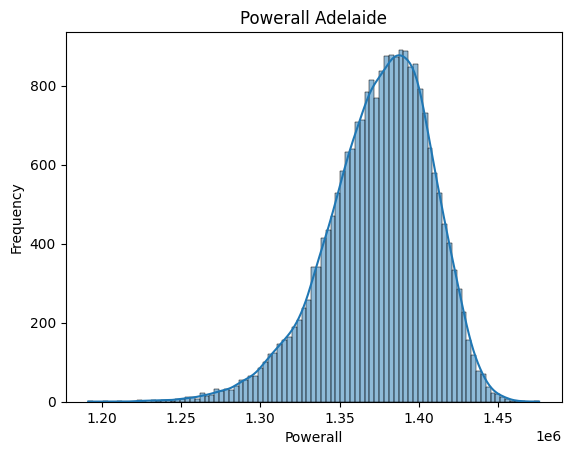

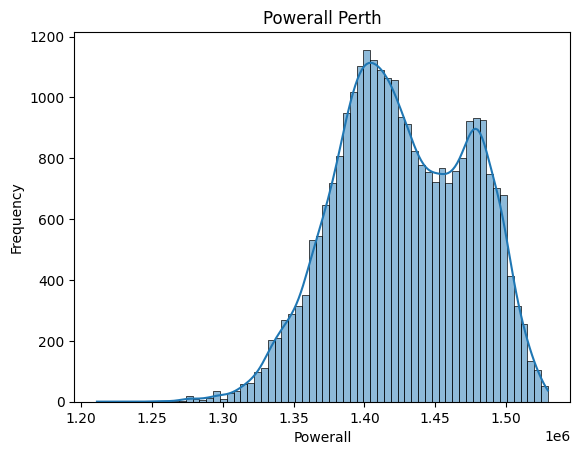

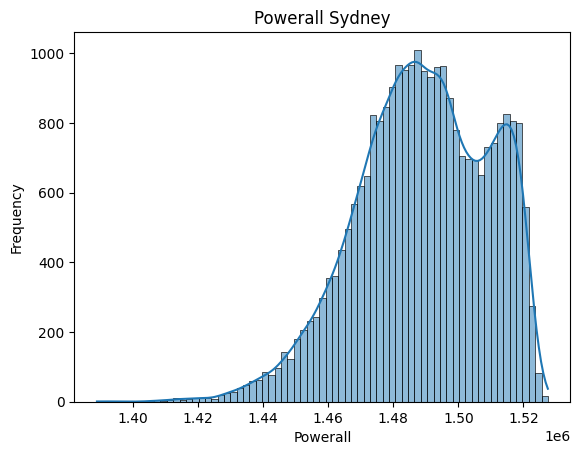

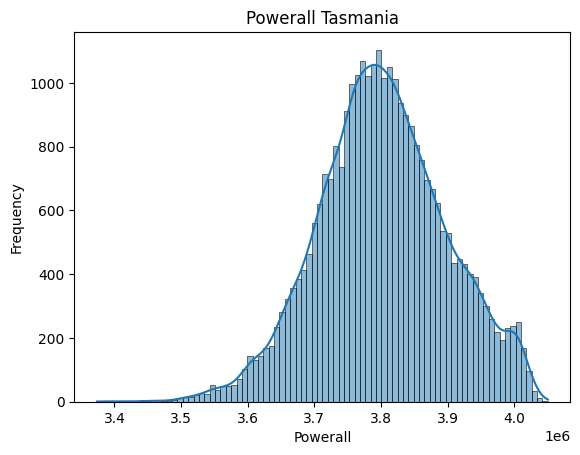

In [ ]:
def histplot_powerall(df, text):

  sns.histplot(df['Powerall'], kde=True)
  plt.title(f'Powerall {text}' )
  plt.xlabel('Powerall')
  plt.ylabel('Frequency')
  plt.show()

histplot_powerall(adelaide_df, "Adelaide")
histplot_powerall(perth_df, "Perth")
histplot_powerall(sydney_df, "Sydney")
histplot_powerall(tasmania_df, "Tasmania")


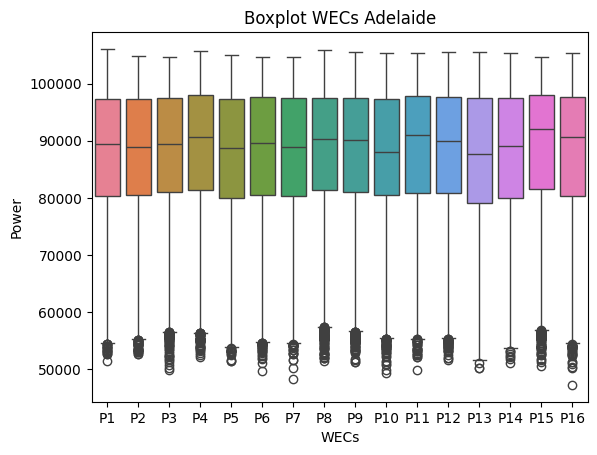

In [ ]:
def boxplot_power(df, name):
  sns.boxplot(data=df[['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14','P15', 'P16']])
  plt.title(f'Boxplot WECs {name}')
  plt.xlabel('WECs')
  plt.ylabel('Power')
  plt.show()

boxplot_power(adelaide_df, "Adelaide")
# boxplot_power(perth_df, "p")
# boxplot_power(sydney_df)
# boxplot_power(tasmania_df)


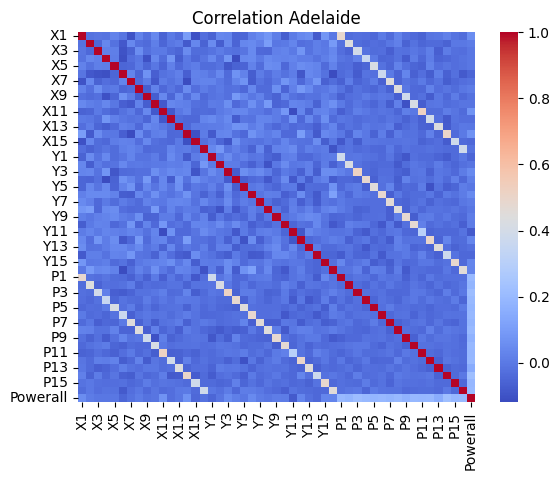

In [ ]:
def corr_matrix(df, name):
  corr_matrix = df.corr()
  sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
  plt.title(f'Correlation {name}')
  plt.show()

corr_matrix(adelaide_df, "Adelaide")


# corr_matrix(perth_df)
# corr_matrix(sydney_df)
# corr_matrix(tasmania_df)


In [7]:
def reduce(df):
  df_reduced = df.drop(columns=[f'P{i}' for i in range(1, 17)])
  return df_reduced

adelaide_df_red = reduce(adelaide_df)
perth_df_red = reduce(perth_df)
sydney_df_red = reduce(sydney_df)
tasmania_df_red = reduce(tasmania_df)

In [8]:
def prepare(df):
    X = df.drop(columns=['Powerall'])
    y = df['Powerall']

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test


def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)
    return model


def predict(model, X):
    return model.predict(X)


def evaluate(y_train, y_train_pred, y_val, y_val_pred):
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mse_val = mean_squared_error(y_val, y_val_pred)
    rmse_val = np.sqrt(mse_val)

    print(f"Training MSE: {mse_train}")
    print(f"Training RMSE: {rmse_train}")
    print(f"Validation MSE: {mse_val}")
    print(f"Validation RMSE: {rmse_val}")

    train_percentage_error = (rmse_train / np.mean(y_train)) * 100
    val_percentage_error = (rmse_val / np.mean(y_val)) * 100

    print(f"Training percentage error: {train_percentage_error:.2f}%")
    print(f"Validation percentage error: {val_percentage_error:.2f}%")

    tolerance_percentage = 5
    if abs(train_percentage_error - val_percentage_error) < tolerance_percentage:
        print("Similar errors. OK.")
    else:
        print("Significantly different errors. NOT OK.")

    acceptable_percentage_error = 10
    if train_percentage_error < acceptable_percentage_error and val_percentage_error < acceptable_percentage_error:
        print("Low errors. OK.")
    else:
        print("High errors. NOT OK.")


def run_model(df, model):
    X_train, X_val, X_test, y_train, y_val, y_test = prepare(df)

    trained_model = train_model(model, X_train, y_train)

    y_train_pred = predict(trained_model, X_train)
    y_val_pred = predict(trained_model, X_val)

    evaluate(y_train, y_train_pred, y_val, y_val_pred)
    print("\n")

model_lr = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=1.0)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, random_state=42)


def models(df):
  print("Linear Regression")
  run_model(df, model_lr)
  print("Ridge Regression")
  run_model(df, ridge_model)
  print("Lasso Regression")
  run_model(df, lasso_model)
  print("Random Forest Regression")
  run_model(df, rf_model)
  print("Gradient Boosting Regression")
  run_model(df, gb_model)
  print("Support Vector Regression")
  run_model(df, svr_model)
  print("XGBoost Regression")
  run_model(df, xgb_model)
  print("Light GBM")
  run_model(df, lgb_model)

In [ ]:
models(adelaide_df_red)

Linear Regression
Training MSE: 2558875812.564908
Training RMSE: 50585.33199026086
Validation MSE: 2626674711.862399
Validation RMSE: 51251.09473818485
Training percentage error: 3.59%
Validation percentage error: 3.63%
Similar errors. OK.
Low errors. OK.


Ridge Regression
Training MSE: 2558875812.564908
Training RMSE: 50585.33199026086
Validation MSE: 2626674711.860931
Validation RMSE: 51251.09473817053
Training percentage error: 3.59%
Validation percentage error: 3.63%
Similar errors. OK.
Low errors. OK.


Lasso Regression
Training MSE: 2558875812.5657496
Training RMSE: 50585.33199026917
Validation MSE: 2626674714.2809987
Validation RMSE: 51251.09476178044
Training percentage error: 3.59%
Validation percentage error: 3.63%
Similar errors. OK.
Low errors. OK.


Random Forest Regression
Training MSE: 80281789.91659643
Training RMSE: 8960.010598018087
Validation MSE: 557590699.6036209
Validation RMSE: 23613.358499028065
Training percentage error: 0.64%
Validation percentage error: 1.67

In [ ]:
models(perth_df_red)

Linear Regression
Training MSE: 2355731439.4467096
Training RMSE: 48535.87785800015
Validation MSE: 2331127328.0263405
Validation RMSE: 48281.74943005214
Training percentage error: 3.48%
Validation percentage error: 3.46%
Similar errors. OK.
Low errors. OK.


Ridge Regression
Training MSE: 2355731439.44671
Training RMSE: 48535.87785800016
Validation MSE: 2331127328.018807
Validation RMSE: 48281.74942997413
Training percentage error: 3.48%
Validation percentage error: 3.46%
Similar errors. OK.
Low errors. OK.


Lasso Regression
Training MSE: 2355731439.447624
Training RMSE: 48535.877858009575
Validation MSE: 2331127303.0211406
Validation RMSE: 48281.74917110129
Training percentage error: 3.48%
Validation percentage error: 3.46%
Similar errors. OK.
Low errors. OK.


Random Forest Regression
Training MSE: 83782712.35295966
Training RMSE: 9153.289701138037
Validation MSE: 584497481.5321095
Validation RMSE: 24176.382722237617
Training percentage error: 0.66%
Validation percentage error: 1.7

In [ ]:
models(sydney_df_red)

Linear Regression
Training MSE: 462009034.56109846
Training RMSE: 21494.395422088484
Validation MSE: 463971997.9750574
Validation RMSE: 21540.009238044848
Training percentage error: 1.45%
Validation percentage error: 1.45%
Similar errors. OK.
Low errors. OK.


Ridge Regression
Training MSE: 462009034.5610984
Training RMSE: 21494.395422088484
Validation MSE: 463971997.97313213
Validation RMSE: 21540.00923800016
Training percentage error: 1.45%
Validation percentage error: 1.45%
Similar errors. OK.
Low errors. OK.


Lasso Regression
Training MSE: 462009034.5621318
Training RMSE: 21494.395422112524
Validation MSE: 463971987.21661985
Validation RMSE: 21540.008988313348
Training percentage error: 1.45%
Validation percentage error: 1.45%
Similar errors. OK.
Low errors. OK.


Random Forest Regression
Training MSE: 11208964.16913238
Training RMSE: 3347.9791171888123
Validation MSE: 80949795.64356361
Validation RMSE: 8997.210436772257
Training percentage error: 0.23%
Validation percentage error

In [ ]:
models(tasmania_df_red)

Linear Regression
Training MSE: 10744919651.037848
Training RMSE: 103657.70425317092
Validation MSE: 10600674414.068941
Validation RMSE: 102959.57660202833
Training percentage error: 2.76%
Validation percentage error: 2.74%
Similar errors. OK.
Low errors. OK.


Ridge Regression
Training MSE: 10744919651.037848
Training RMSE: 103657.70425317092
Validation MSE: 10600674414.052595
Validation RMSE: 102959.57660194895
Training percentage error: 2.76%
Validation percentage error: 2.74%
Similar errors. OK.
Low errors. OK.


Lasso Regression
Training MSE: 10744919651.038706
Training RMSE: 103657.70425317505
Validation MSE: 10600674396.719368
Validation RMSE: 102959.57651777404
Training percentage error: 2.76%
Validation percentage error: 2.74%
Similar errors. OK.
Low errors. OK.


Random Forest Regression
Training MSE: 531865806.8254186
Training RMSE: 23062.21599988645
Validation MSE: 3769342325.4592166
Validation RMSE: 61394.96987098549
Training percentage error: 0.61%
Validation percentage e

In [5]:
def tune_xgboost_hyperparameters(X_train, y_train, X_val, y_val):
    """
    Perform hyperparameter tuning for XGBoost using GridSearchCV.

    Parameters:
    - X_train: Training features
    - y_train: Training target
    - X_val: Validation features
    - y_val: Validation target

    Returns:
    - best_model: The XGBoost model with the best hyperparameters
    - best_params: The optimal hyperparameters
    """

    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }

    xgb_model = xgb.XGBRegressor(random_state=42)

    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',  
        cv=3,  # 3-fold cross-validation
        verbose=1,
        n_jobs=-1 
    )

    X_train_val = pd.concat([X_train, X_val])
    y_train_val = pd.concat([y_train, y_val])

    grid_search.fit(X_train_val, y_train_val)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    print("Best Hyperparameters:", best_params)
    return best_model, best_params


In [11]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare(adelaide_df_red)

best_xgb_model, best_xgb_params = tune_xgboost_hyperparameters(X_train, y_train, X_val, y_val)

print("Final Tuned Model:", best_xgb_model)

y_test_pred = best_xgb_model.predict(X_test)
final_evaluate(y_test, y_test_pred)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Final Tuned Model: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)
Test MSE: 345669347.5060055
Test RMSE: 18592.18511918396
Test percentage error: 1.32%
OK.


In [19]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare(adelaide_df_red)
best_xgb_model.fit(X_train, y_train)
y_train_pred = best_xgb_model.predict(X_train)
y_val_pred = best_xgb_model.predict(X_val)

evaluate(y_train, y_train_pred, y_val, y_val_pred)

Training MSE: 86419802.2457029
Training RMSE: 9296.225161091083
Validation MSE: 358700252.8625626
Validation RMSE: 18939.383645265825
Training percentage error: 0.66%
Validation percentage error: 1.34%
Similar errors. OK.
Low errors. OK.


In [22]:
def plot_scatter(y_test, y_pred):
    plt.figure(figsize=(4, 3))
    plt.scatter(y_test, y_pred, alpha=0.7, color='pink')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.title('Actual vs Predicted values')
    plt.xlabel('Actual Powerall')
    plt.ylabel('Predicted Powerall')
    plt.grid(True)
    plt.show()

def plot_error_histogram(y_test, y_pred):
    errors = y_test - y_pred
    plt.figure(figsize=(4, 3))
    plt.hist(errors, bins=50, color='purple', alpha=0.7)
    plt.title('Distribution of Prediction Errors')
    plt.xlabel('Prediction Error (Actual - Predicted)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [20]:
def prepare_final_training_data(df):
    X = df.drop(columns=['Powerall'])
    y = df['Powerall']

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    return X_train_val, X_test, y_train_val, y_test

def final_evaluate(y_test, y_test_pred):
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    test_percentage_error = (rmse_test / np.mean(y_test)) * 100

    print(f"Test MSE: {mse_test}")
    print(f"Test RMSE: {rmse_test}")
    print(f"Test percentage error: {test_percentage_error:.2f}%")

    acceptable_percentage_error = 10
    if test_percentage_error < acceptable_percentage_error:
        print("OK.")
    else:
        print("Too high. NOT OK")

def final_model(df):
  X_train_val, X_test, y_train_val, y_test = prepare_final_training_data(df)

  best_model = best_xgb_model
  best_model.fit(X_train_val, y_train_val)

  y_test_pred = best_model.predict(X_test)

  final_evaluate(y_test, y_test_pred)
  plot_scatter(y_test, y_test_pred)
  plot_error_histogram(y_test, y_test_pred)


Test MSE: 358782693.2164275
Test RMSE: 18941.559946752735
Test percentage error: 1.34%
OK.


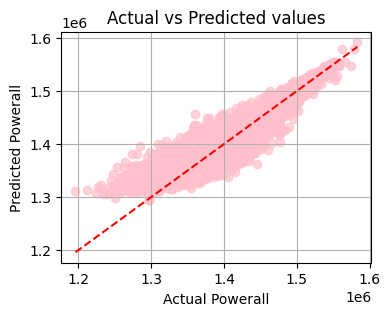

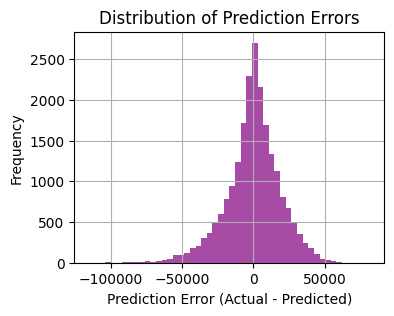

In [23]:
final_model(adelaide_df_red)

Test MSE: 372579899.391316
Test RMSE: 19302.32885926763
Test percentage error: 1.38%
OK.


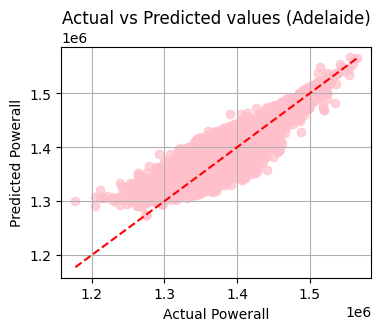

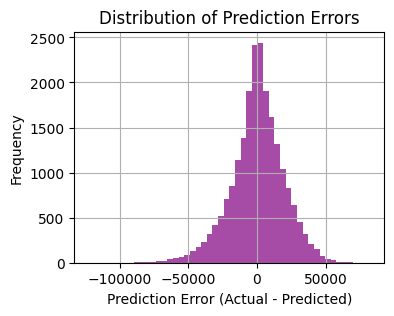

In [21]:
final_model(perth_df_red)

Test MSE: 51497390.34902187
Test RMSE: 7176.168221901007
Test percentage error: 0.48%
OK.


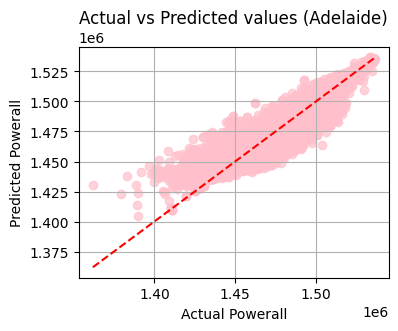

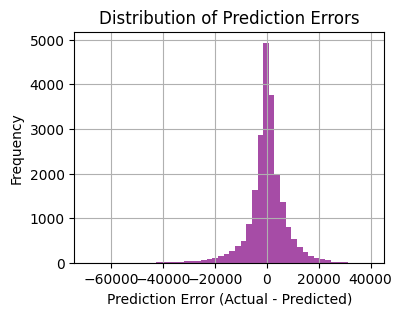

In [18]:
final_model(sydney_df_red)

Test MSE: 2807805086.646852
Test RMSE: 52988.726033438965
Test percentage error: 1.41%
OK.


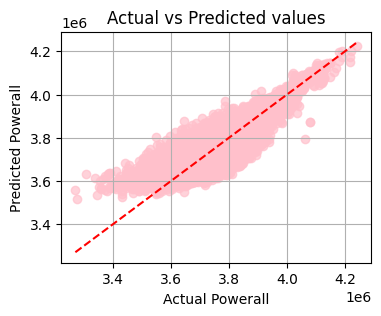

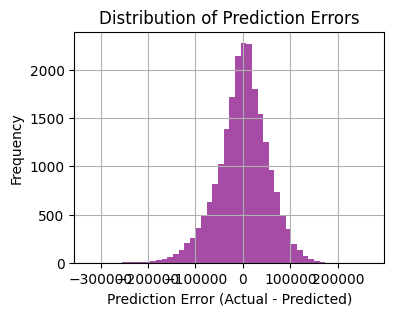

In [ ]:
final_model(tasmania_df_red)